<a href="https://colab.research.google.com/github/hanbitgoun/GJ_AI/blob/main/deep_learning/0713_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
faults = pd.read_csv('/content/faults_mini.csv')

display(faults.head())
display(faults.info())

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,42,270900,267,80,1,0,0
1,1084,185575,108,40,0,0,1
2,1109,1170194,130,175,0,1,0
3,190,210936,132,150,1,0,0
4,330,429227,264,150,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   X_Minimum              10 non-null     int64
 1   Y_Minimum              10 non-null     int64
 2   Pixels_Areas           10 non-null     int64
 3   Steel_Plate_Thickness  10 non-null     int64
 4   Pastry                 10 non-null     int64
 5   Z_Scratch              10 non-null     int64
 6   K_Scatch               10 non-null     int64
dtypes: int64(7)
memory usage: 688.0 bytes


None

In [4]:
faults.describe()
# 값의 대소관계 클수록 > 큰값이 더 많은 영향 : Min-Max Normalization

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
count,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,336.800000,4.980733e+05,1102.300000,96.500000,0.400000,0.300000,0.300000
std,419.946769,3.014717e+05,1591.202973,53.750969,0.516398,0.483046,0.483046
min,42.000000,1.855750e+05,108.000000,40.000000,0.000000,0.000000,0.000000
25%,48.750000,2.948952e+05,133.750000,47.500000,0.000000,0.000000,0.000000
50%,132.000000,4.033820e+05,265.500000,75.000000,0.000000,0.000000,0.000000
75%,380.250000,5.998238e+05,1240.500000,150.000000,1.000000,0.750000,0.750000
max,1109.000000,1.170194e+06,4048.000000,175.000000,1.000000,1.000000,1.000000


In [5]:
var_x_outlier = [100] 
var_x = np.random.randint(0,7,size=99)  
var_x = np.hstack([var_x,var_x_outlier]) # outlier 포함

var_y = np.random.randint(0,40,size=100)

print(var_x)
print()
print(var_y)

[  6   2   3   3   1   4   2   2   0   0   6   1   3   4   3   2   2   4
   2   0   4   6   2   2   6   4   5   5   4   3   0   6   0   4   0   6
   0   5   5   2   3   2   1   0   5   5   0   5   4   5   6   5   4   3
   4   5   5   3   0   1   6   0   3   0   6   4   4   4   5   4   3   0
   6   4   6   6   2   4   3   2   3   6   6   4   3   4   0   1   2   4
   1   2   0   2   4   5   3   6   6 100]

[36 30 21 12 11 21 21 39 33 34  6 23 28 28 21  7 11 17  9  6 20 37  6 38
 30 30 17 10 29 11 16 12 32  1 19 29  1  6 33 18 38  3 10 18 32  7 10 30
 36  3 24 35  7 22 39 27 37  5 23 12 18 28 25  2 24  2 29  9 25 37 30  0
 19 14 32  5 13 14 26  4 15 15 25 35 37 37 16 32  1 21 35 37  3 23 11  7
 27  0 12 39]


#### min-max normalization

In [6]:
var_x_norm = (var_x - var_x.min()) / (var_x.max() - var_x.min())
var_y_norm = (var_y - var_y.min()) / (var_y.max() - var_y.min())

print(var_x_norm[-1:])
print(var_y_norm[:5])

[1.]
[0.92307692 0.76923077 0.53846154 0.30769231 0.28205128]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


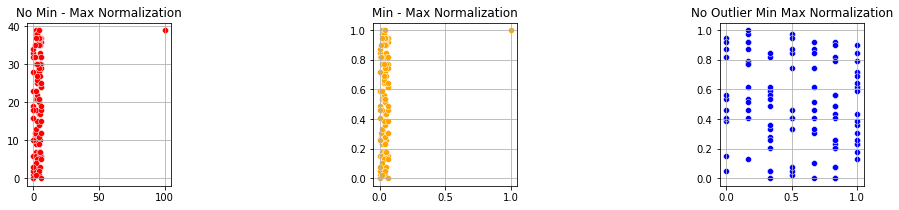

In [7]:
plt.figure(figsize=(15,3))

plt.subplot(1,5,1)
sns.scatterplot(var_x, var_y, color='red')
plt.title('No Min - Max Normalization')
plt.grid()

plt.subplot(1,5,3)
sns.scatterplot(var_x_norm, var_y_norm, color='orange')
plt.title('Min - Max Normalization')
plt.grid()

var_x = np.random.randint(0,7,size=100)
var_y = np.random.randint(0,40,size=100)
var_x_norm = (var_x - var_x.min()) / (var_x.max() - var_x.min())
var_y_norm = (var_y - var_y.min()) / (var_y.max() - var_y.min())

plt.subplot(1,5,5)
sns.scatterplot(var_x_norm, var_y_norm, color='blue')
plt.title('No Outlier Min Max Normalization')
plt.grid()

plt.show()

In [8]:
# min-max normalization
faults_norm = (faults - faults.min()) / (faults.max() - faults.min())
print(faults_norm.head())

   X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
0   0.000000   0.086658      0.040355  ...     1.0        0.0       0.0
1   0.976570   0.000000      0.000000  ...     0.0        0.0       1.0
2   1.000000   1.000000      0.005584  ...     0.0        1.0       0.0
3   0.138707   0.025757      0.006091  ...     1.0        0.0       0.0
4   0.269916   0.247458      0.039594  ...     1.0        0.0       0.0

[5 rows x 7 columns]


In [9]:
display(faults_norm.describe())

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.276289,0.317380,0.252360,0.418519,0.400000,0.300000,0.300000
std,0.393577,0.306181,0.403859,0.398155,0.516398,0.483046,0.483046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006326,0.111028,0.006536,0.055556,0.000000,0.000000,0.000000
50%,0.084349,0.221209,0.039975,0.259259,0.000000,0.000000,0.000000
75%,0.317010,0.420720,0.287437,0.814815,1.000000,0.750000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
print(faults_norm[:5])
faults_shuffle = faults_norm.sample(frac=1) # sample() : 랜덤한 샘플 추출 (frac = 1 : 전체 데이터)
print(faults_shuffle[:5])

   X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
0   0.000000   0.086658      0.040355  ...     1.0        0.0       0.0
1   0.976570   0.000000      0.000000  ...     0.0        0.0       1.0
2   1.000000   1.000000      0.005584  ...     0.0        1.0       0.0
3   0.138707   0.025757      0.006091  ...     1.0        0.0       0.0
4   0.269916   0.247458      0.039594  ...     1.0        0.0       0.0

[5 rows x 7 columns]
   X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
2   1.000000   1.000000      0.005584  ...     0.0        1.0       0.0
9   0.005623   0.194961      0.984010  ...     0.0        0.0       1.0
5   0.029991   0.602841      0.354822  ...     1.0        0.0       0.0
8   0.000937   0.184138      1.000000  ...     0.0        0.0       1.0
0   0.000000   0.086658      0.040355  ...     1.0        0.0       0.0

[5 rows x 7 columns]


In [11]:
faults_np = faults_shuffle.to_numpy() # numpy 형식으로 변경
print(type(faults_np))

<class 'numpy.ndarray'>


In [12]:
train_ratio = 0.8 # 학습데이터 비율
input_cnt = 4 
output_cnt = 3

train_idx = int(len(faults_np) * train_ratio)
print("train_idx : ", train_idx)

train_idx :  8


In [13]:
train_X, train_Y = faults_np[:train_idx,:-output_cnt], faults_np[:train_idx,-output_cnt:] # 학습데이터의 독립, 종속변수
test_X, test_Y = faults_np[train_idx:,:-output_cnt], faults_np[train_idx:,-output_cnt:]

print(train_X.shape)
print(train_Y.shape)
print("======================")
print(test_X.shape)
print(test_Y.shape)

(8, 4)
(8, 3)
(2, 4)
(2, 3)


In [14]:
# loss function : cross entropy 인 이유?
# total params : weight + bias

In [15]:
# 모델 설계 방식 수업자료 참고
simple_layer_model = tf.keras.Sequential([
                                          tf.keras.layers.Dense(units=3,
                                                                activation='softmax',
                                                                input_shape=(4,))
                                          ])

In [16]:
simple_layer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [17]:
simple_layer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                           loss = 'categorical_crossentropy') # 다중 분류

In [18]:
history_1 = simple_layer_model.fit(train_X, train_Y,
                                  epochs=25, batch_size=2)

Epoch 1/25
4/4 [==============================] - 1s 3ms/step - loss: 1.2209
Epoch 2/25
4/4 [==============================] - 0s 3ms/step - loss: 1.1893
Epoch 3/25
4/4 [==============================] - 0s 3ms/step - loss: 1.1615
Epoch 4/25
4/4 [==============================] - 0s 4ms/step - loss: 1.1309
Epoch 5/25
4/4 [==============================] - 0s 3ms/step - loss: 1.1062
Epoch 6/25
4/4 [==============================] - 0s 3ms/step - loss: 1.0767
Epoch 7/25
4/4 [==============================] - 0s 3ms/step - loss: 1.0557
Epoch 8/25
4/4 [==============================] - 0s 6ms/step - loss: 1.0295
Epoch 9/25
4/4 [==============================] - 0s 5ms/step - loss: 1.0079
Epoch 10/25
4/4 [==============================] - 0s 4ms/step - loss: 0.9884
Epoch 11/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9670
Epoch 12/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9464
Epoch 13/25
4/4 [==============================] - 0s 4ms/step - loss: 0.

In [19]:
simple_layer_model.evaluate(test_X, test_Y)

1/1 [==============================] - 0s 152ms/step - loss: 1.1218


1.121754765510559

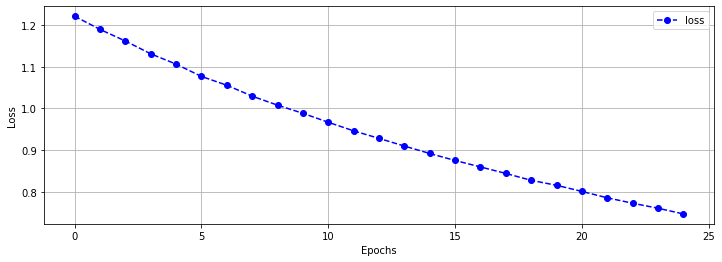

In [20]:
plt.figure(figsize=(12,4))
plt.plot(history_1.history['loss'], 'b--o', label = 'loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [21]:
pred_Y = simple_layer_model.predict(test_X)
print(pred_Y)

[[0.31720555 0.40322286 0.2795716 ]
 [0.3677472  0.3794575  0.25279528]]


In [22]:
pred_Y = np.argmax(pred_Y, axis=1)
print(pred_Y)

[1 1]


In [23]:
test_Y = np.argmax(test_Y, axis=1)
print(test_Y)

[2 1]


In [24]:
acc = np.mean(np.equal(pred_Y, test_Y))
print("ACC : {} %".format(acc))

ACC : 0.5 %
